In [22]:
import os
import cv2
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew


In [23]:
def extract_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    mean_val = np.mean(img)
    kurtosis_val = kurtosis(img.ravel())
    std_val = np.std(img)
    rms_val = np.sqrt(np.mean(img**2))
    var_val = np.var(img)
    skewness_val = skew(img.ravel())

    return [mean_val, kurtosis_val, std_val, rms_val, var_val, skewness_val]


In [24]:
data = []

# Assuming you have four classes, each with a folder containing 150 images
class_names = ['DENT', 'GOOD', 'OVER_EXTRUSION', 'SCRATCH']

for class_name in class_names:
    class_path = f'./files/{class_name}/'
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        features = extract_features(img_path)
        data.append([class_name] + features)


In [26]:
columns = ['Class', 'Mean', 'Kurtosis', 'Std', 'RMS', 'Variance', 'Skewness']
df = pd.DataFrame(data, columns=columns)

# Save to CSV file
output_csv_path = './data.csv'
df.to_csv(output_csv_path, index=False)


In [27]:
import pandas as pd

data = pd.read_csv('./data.csv')
X = data.drop('Class', axis=1)
y = data['Class']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [30]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0, random_state=12)
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=12)

In [31]:
from sklearn.metrics import accuracy_score

def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# KNN
knn_accuracy = evaluate_classifier(knn_classifier, X_test, y_test)

# SVM
svm_accuracy = evaluate_classifier(svm_classifier, X_test, y_test)

print("KNN Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)


KNN Accuracy: 0.9166666666666666
SVM Accuracy: 0.5083333333333333


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


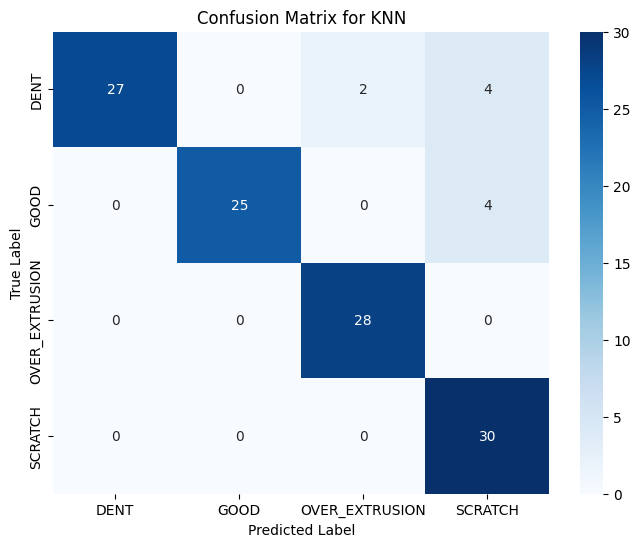

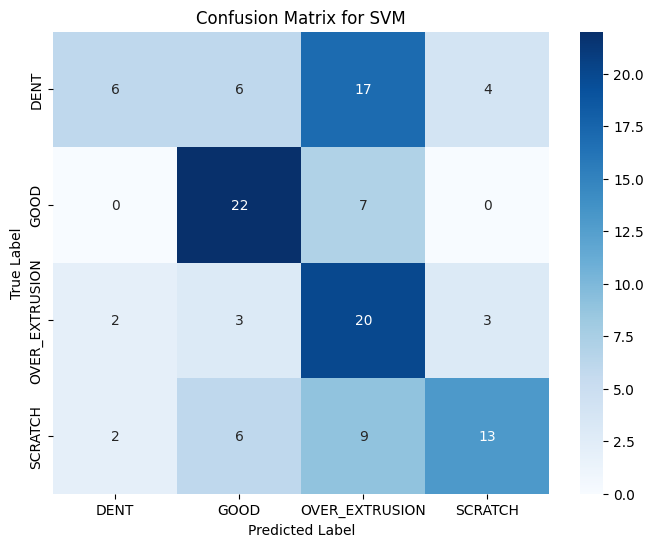

In [34]:
def plot_confusion_matrix(y_true, y_pred, class_names, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


# KNN
knn_y_pred = knn_classifier.predict(X_test)
plot_confusion_matrix(y_test, knn_y_pred, class_names, "KNN")

# SVM
svm_y_pred = svm_classifier.predict(X_test)
plot_confusion_matrix(y_test, svm_y_pred, class_names, "SVM")


In [35]:
def print_classification_report(y_true, y_pred, model_name):
    print(f"Classification Report for {model_name}:\n")
    report = classification_report(y_true, y_pred)
    print(report)



# KNN
print_classification_report(y_test, knn_y_pred, "KNN")

# SVM
print_classification_report(y_test, svm_y_pred, "SVM")


Classification Report for KNN:

                precision    recall  f1-score   support

          DENT       1.00      0.82      0.90        33
          GOOD       1.00      0.86      0.93        29
OVER_EXTRUSION       0.93      1.00      0.97        28
       SCRATCH       0.79      1.00      0.88        30

      accuracy                           0.92       120
     macro avg       0.93      0.92      0.92       120
  weighted avg       0.93      0.92      0.92       120

Classification Report for SVM:

                precision    recall  f1-score   support

          DENT       0.60      0.18      0.28        33
          GOOD       0.59      0.76      0.67        29
OVER_EXTRUSION       0.38      0.71      0.49        28
       SCRATCH       0.65      0.43      0.52        30

      accuracy                           0.51       120
     macro avg       0.56      0.52      0.49       120
  weighted avg       0.56      0.51      0.48       120

